In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

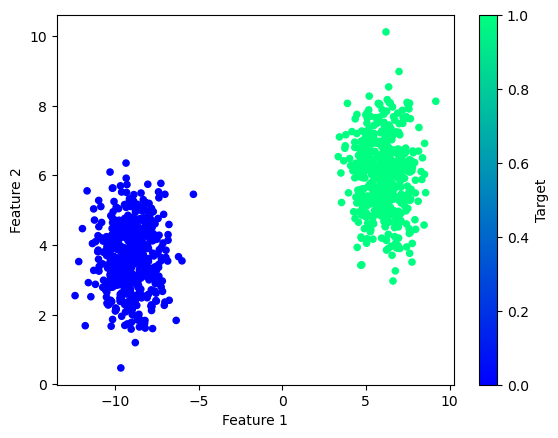

In [2]:
# Generate dummy dataset
X,y = make_blobs(n_samples=1000, centers = 2, n_features=2, random_state=78)

# Creating a DataFrame with dummy data

df = pd.DataFrame(X, columns = ['Feature 1', 'Feature 2'])
df['Target'] = y

# Plotting the dummy data
df.plot.scatter(x = 'Feature 1', y='Feature 2', c='Target', colormap='winter')

In [3]:
# Split the dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 78)

In [4]:
# Scale data

# Instance
X_scaler = skl.preprocessing.StandardScaler()

#Fit
X_scaler.fit(X_train)

# Run
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled  = X_scaler.transform(X_test)



In [5]:
# Create Keras Sequential model

nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including input layer

nn_model.add(tf.keras.layers.Dense(units = 1, activation='relu', input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function

nn_model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [8]:
# Check the structure of the model

nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model and add customize metrics for model control

nn_model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [10]:
# Fit the model to the training data

fit_model = nn_model.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
24/24 [==============================] - 0s 935us/step - loss: 0.7201 - accuracy: 0.5067
Epoch 2/100
24/24 [==============================] - 0s 940us/step - loss: 0.7034 - accuracy: 0.4973
Epoch 3/100
24/24 [==============================] - 0s 877us/step - loss: 0.6936 - accuracy: 0.5187
Epoch 4/100
24/24 [==============================] - 0s 827us/step - loss: 0.6871 - accuracy: 0.6547
Epoch 5/100
24/24 [==============================] - 0s 827us/step - loss: 0.6753 - accuracy: 0.8427
Epoch 6/100
24/24 [==============================] - 0s 869us/step - loss: 0.6505 - accuracy: 0.9853
Epoch 7/100
24/24 [==============================] - 0s 935us/step - loss: 0.6215 - accuracy: 0.9987
Epoch 8/100
24/24 [==============================] - 0s 848us/step - loss: 0.5946 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 872us/step - loss: 0.5695 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 913us/step - loss: 0.5461 - accura

<AxesSubplot:>

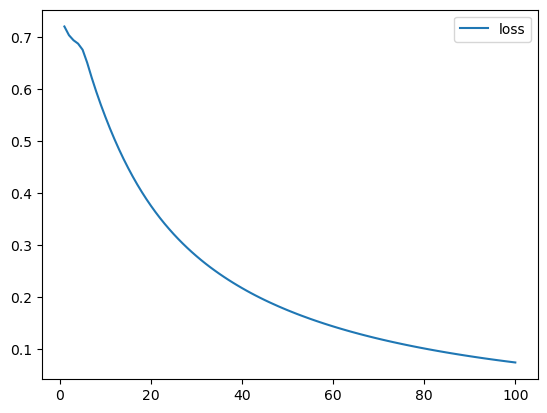

In [11]:
# Capture information in a DataFrame

history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
                
# Plot the loss
                          
history_df.plot(y='loss')                       

<AxesSubplot:>

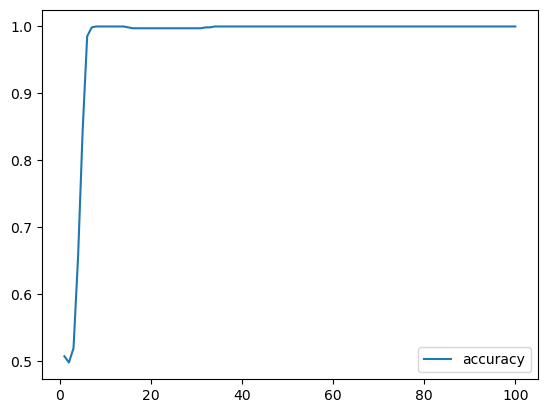

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}" )

8/8 - 0s - loss: 0.0751 - accuracy: 1.0000 - 135ms/epoch - 17ms/step
Loss: 0.07508062571287155, Accuracy: 1.0


In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 80ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

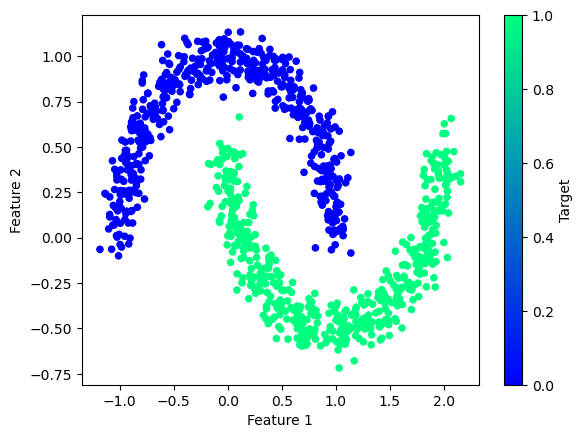

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 846us/step - loss: 0.9200 - accuracy: 0.5360
Epoch 2/100
24/24 [==============================] - 0s 895us/step - loss: 0.7845 - accuracy: 0.5733
Epoch 3/100
24/24 [==============================] - 0s 914us/step - loss: 0.6925 - accuracy: 0.6067
Epoch 4/100
24/24 [==============================] - 0s 927us/step - loss: 0.6296 - accuracy: 0.6333
Epoch 5/100
24/24 [==============================] - 0s 978us/step - loss: 0.5818 - accuracy: 0.6600
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5433 - accuracy: 0.6747
Epoch 7/100
24/24 [==============================] - 0s 965us/step - loss: 0.5119 - accuracy: 0.7000
Epoch 8/100
24/24 [==============================] - 0s 850us/step - loss: 0.4849 - accuracy: 0.7107
Epoch 9/100
24/24 [==============================] - 0s 980us/step - loss: 0.4618 - accuracy: 0.7280
Epoch 10/100
24/24 [==============================] - 0s 828us/step - loss: 0.4417 - accuracy

<AxesSubplot:>

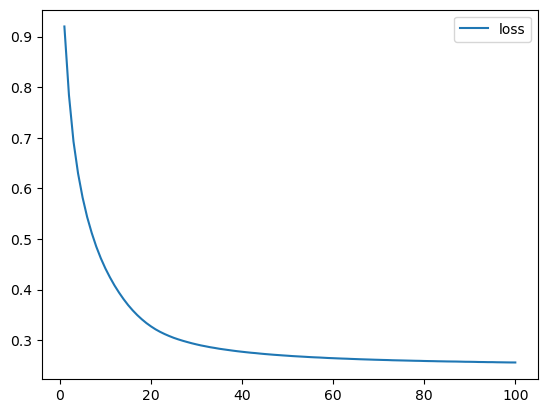

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

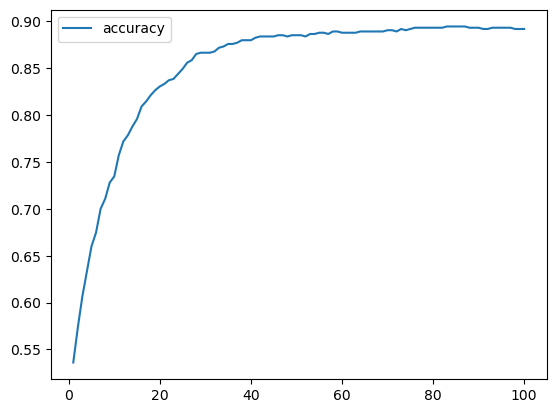

In [22]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [23]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 982us/step - loss: 0.8467 - accuracy: 0.3933
Epoch 2/100
24/24 [==============================] - 0s 804us/step - loss: 0.8042 - accuracy: 0.4013
Epoch 3/100
24/24 [==============================] - 0s 848us/step - loss: 0.7654 - accuracy: 0.4080
Epoch 4/100
24/24 [==============================] - 0s 850us/step - loss: 0.7307 - accuracy: 0.4107
Epoch 5/100
24/24 [==============================] - 0s 825us/step - loss: 0.6968 - accuracy: 0.4173
Epoch 6/100
24/24 [==============================] - 0s 805us/step - loss: 0.6636 - accuracy: 0.4947
Epoch 7/100
24/24 [==============================] - 0s 825us/step - loss: 0.6308 - accuracy: 0.5907
Epoch 8/100
24/24 [==============================] - 0s 911us/step - loss: 0.5990 - accuracy: 0.6693
Epoch 9/100
24/24 [==============================] - 0s 931us/step - loss: 0.5680 - accuracy: 0.7813
Epoch 10/100
24/24 [==============================] - 0s 827us/step - loss: 0.5385 - accura